In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
from google.colab import drive

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/MyDrive/MLprojects/resumeanalyzer/UpdatedResumeDataSet.csv')

In [30]:
#1 understanding the data

In [31]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [32]:
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [33]:
data.shape

(962, 2)

In [34]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [35]:
data.columns

Index(['Category', 'Resume'], dtype='object')

In [36]:
data.nunique()

,0
Category,25
Resume,166


In [37]:
#2 Cleaning the data

In [38]:
data.isnull().sum()

,0
Category,0
Resume,0


In [39]:
#3 Relationship analysis

In [40]:
numeric_df = data.select_dtypes(include='number')  # Keep only numeric columns
correlation = numeric_df.corr()  # Now this works

In [41]:
if correlation.empty:
    print("No numeric columns available for correlation.")
else:
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
    plt.show()

No numeric columns available for correlation.


In [42]:
data['cleaned_resume'] = ''

import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [43]:
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [45]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data (if not already loaded)
# data = pd.read_csv('your_file.csv')  # Replace with your actual data if needed

# Extract resume text
resumes = data['Resume']  # Assuming the column is named 'Resume'

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # limit to top 1000 terms

# Fit and transform the data
X_tfidf = vectorizer.fit_transform(resumes)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Show sample of TF-IDF matrix
print(tfidf_df.head())


    01   10   11  11g        12   14   15   16   20      2000  ...    worked  \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...  0.026602   
1  0.0  0.0  0.0  0.0  0.096788  0.0  0.0  0.0  0.0  0.000000  ...  0.072588   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.200436  ...  0.000000   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  ...  0.000000   

    working  workshop  world  writing  wrote  www   xp      year  years  
0  0.000000       0.0    0.0      0.0    0.0  0.0  0.0  0.023452    0.0  
1  0.000000       0.0    0.0      0.0    0.0  0.0  0.0  0.383958    0.0  
2  0.043969       0.0    0.0      0.0    0.0  0.0  0.0  0.383699    0.0  
3  0.000000       0.0    0.0      0.0    0.0  0.0  0.0  0.066663    0.0  
4  0.000000       0.0    0.0      0.0    0.0  0.0  0.0  0.626164    0.0  

[5 rows x 1000 columns]


In [47]:
import pandas as pd

# Assuming 'data' is your DataFrame
X = data['Resume']         # Feature: Resume text
y = data['Category']       # Target: Job category / label (change column name if needed)

# Optional: View shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (962,)
y shape: (962,)


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load your dataset (assume it's already loaded in `data`)
# Example: data = pd.read_csv("your_data.csv")

# Step 2: Assign X and y
X = data['Resume']
y = data['Category']

# Step 3: Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 5: Train a Machine Learning Model (Logistic Regression here)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9948186528497409

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00    

<ipython-input-50-43f71b7c0e87>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


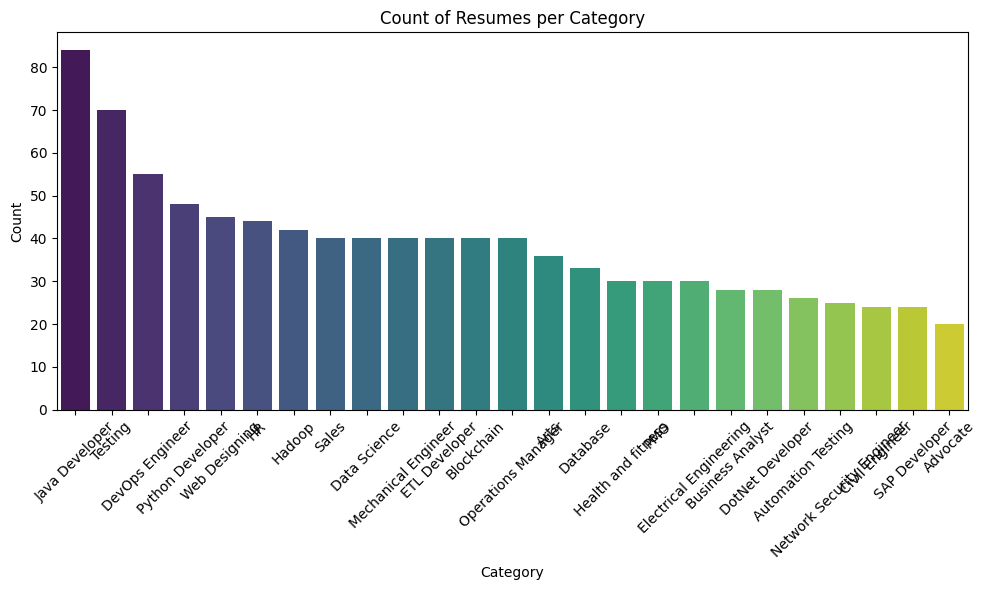

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/MLprojects/resumeanalyzer/UpdatedResumeDataSet.csv")  # Use the actual path or dataframe

# Count of each category
category_counts = df['Category'].value_counts()

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Count of Resumes per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


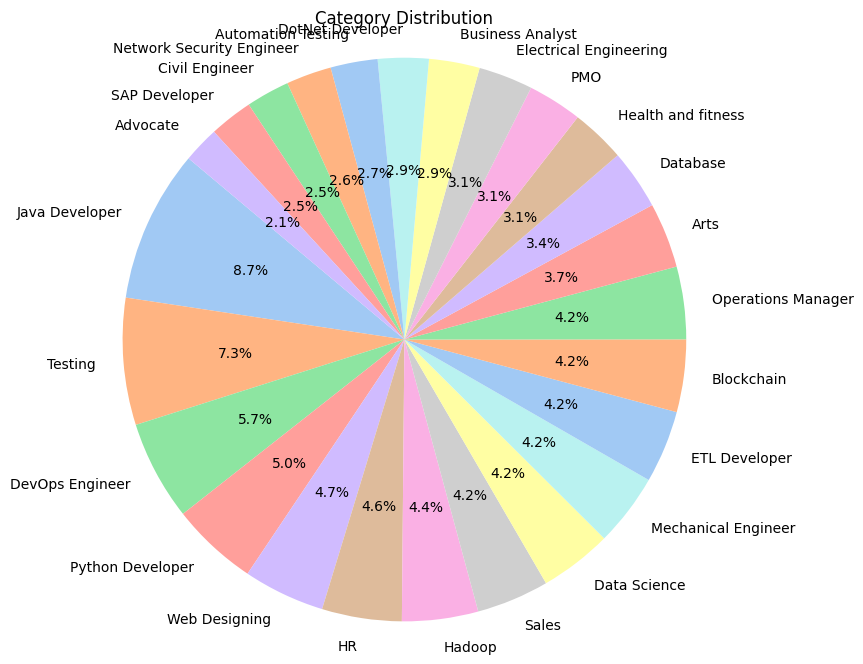

In [51]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Category Distribution')
plt.axis('equal')
plt.show()
